In [9]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from IPython.display import Video

from scipy import integrate as int

In [10]:
A = SlabExact(xrefs=[100, 200, 100], 
              symmetric=True
             )

In [11]:
tol=.007
def f(x, tol=tol):
    return 2/tol * np.where(np.abs(x)<= tol,1,0)
    # if np.abs(x) <= .001:
    #     return 1
    # else:
    #     return 0

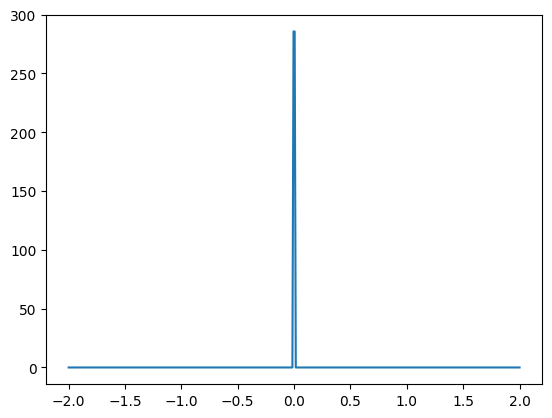

In [12]:
plt.plot(np.concatenate(A.Xs),f(np.concatenate(A.Xs)))

In [13]:
alpha_of_beta = A.approximate_radiation_coefficients(f, L=-tol, R=tol, phase=0)

In [14]:
betas = np.linspace(-A.K_low, A.K_low, 500)

In [15]:
alphas = np.array([alpha_of_beta(betas[i]) for i in range(len(betas))])

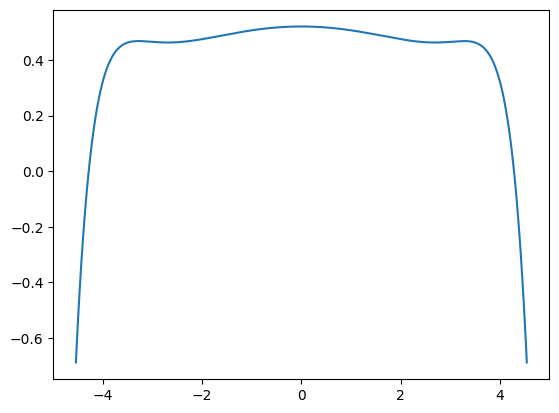

In [16]:
plt.plot(betas, alphas.real/4);

Below is for the delta impulse at zero

In [17]:
M = A.coefficients(betas, up_to_region=1, mode_type='radiation', phase=0)

In [18]:
exact_alphas_for_delta_at_zero = np.sum(M[:,:,1], axis=1)

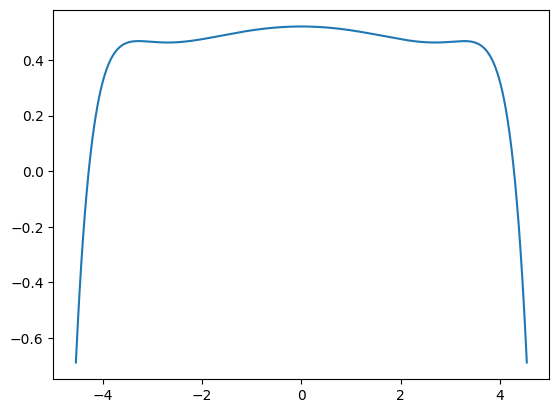

In [19]:
plt.plot(betas, exact_alphas_for_delta_at_zero.real)

In [20]:
alphas.real/ exact_alphas_for_delta_at_zero.real

array([3.99977711, 3.99977172, 3.99976636, 3.99976103, 3.99975571,
       3.99975042, 3.99974514, 3.99973989, 3.99973466, 3.99972945,
       3.99972427, 3.9997191 , 3.99971396, 3.99970884, 3.99970374,
       3.99969866, 3.9996936 , 3.99968856, 3.99968355, 3.99967856,
       3.99967359, 3.99966864, 3.99966371, 3.99965881, 3.99965392,
       3.99964906, 3.99964422, 3.9996394 , 3.9996346 , 3.99962983,
       3.99962507, 3.99962034, 3.99961563, 3.99961094, 3.99960627,
       3.99960162, 3.999597  , 3.9995924 , 3.99958781, 3.99958325,
       3.99957872, 3.9995742 , 3.9995697 , 3.99956523, 3.99956078,
       3.99955635, 3.99955194, 3.99954755, 3.99954319, 3.99953884,
       3.99953452, 3.99953022, 3.99952594, 3.99952169, 3.99951745,
       3.99951324, 3.99950904, 3.99950487, 3.99950072, 3.9994966 ,
       3.99949249, 3.99948841, 3.99948434, 3.9994803 , 3.99947628,
       3.99947228, 3.99946831, 3.99946435, 3.99946042, 3.99945651,
       3.99945262, 3.99944875, 3.9994449 , 3.99944108, 3.99943

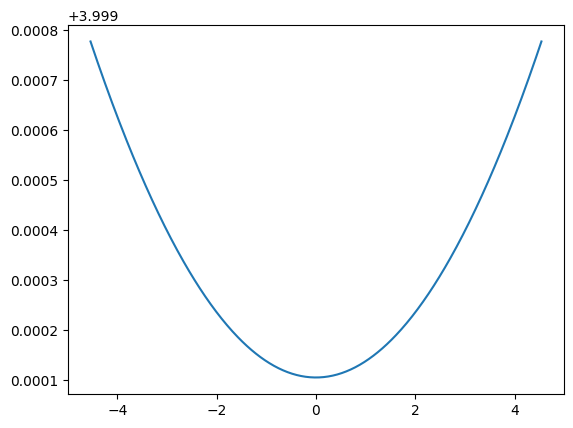

In [21]:
plt.plot(betas, alphas.real/ exact_alphas_for_delta_at_zero.real)

In [31]:
M = A.coefficients(betas*1j, up_to_region=1, mode_type='radiation', sign='1')

In [32]:
exact_alphas_for_delta_at_zero = np.sum(M[:,:,1], axis=1)
M[0,0]

array([0.34042934-2.07997128e-01j, 0.38749159+2.98372438e-16j])

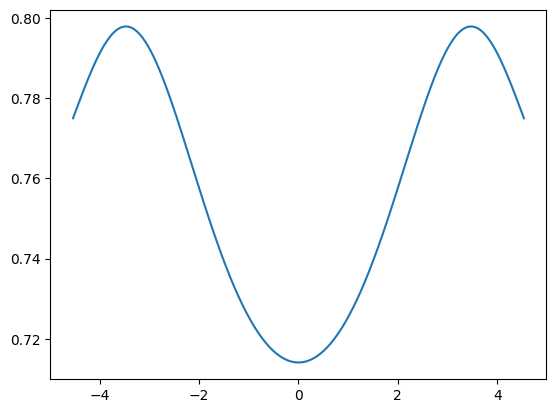

In [34]:
plt.plot(betas, exact_alphas_for_delta_at_zero.real)

If we do it with any other phase we get a constant.  Actually, no we don't...  don't know what changed.

In [16]:
M = A.coefficients(betas, up_to_region=2, mode_type='radiation', phase=1)

In [16]:
M[:,:,1]

array([[-0.18604045+0.10886011j, -0.18604045-0.10886011j],
       [-0.3738907 +0.13472082j, -0.3738907 -0.13472082j],
       [-0.36218004+0.13558131j, -0.36218004-0.13558131j],
       [-0.32628317+0.14139792j, -0.32628317-0.14139792j],
       [-0.28527899+0.15291971j, -0.28527899-0.15291971j],
       [-0.24584761+0.16880697j, -0.24584761-0.16880697j],
       [-0.21056794+0.18748837j, -0.21056794-0.18748837j],
       [-0.18027332+0.20759745j, -0.18027332-0.20759745j],
       [-0.15498221+0.22806443j, -0.15498221-0.22806443j],
       [-0.13433068+0.24810363j, -0.13433068-0.24810363j],
       [-0.11779118+0.26717025j, -0.11779118-0.26717025j],
       [-0.10478783+0.28491204j, -0.10478783-0.28491204j],
       [-0.09475713+0.30112513j, -0.09475713-0.30112513j],
       [-0.08717874+0.31571659j, -0.08717874-0.31571659j],
       [-0.08158928+0.32867399j, -0.08158928-0.32867399j],
       [-0.07758638+0.34004143j, -0.07758638-0.34004143j],
       [-0.07482741+0.34990097j, -0.07482741-0.34990097j

In [17]:
exact_alphas_for_delta_at_zero = np.sum(M[:,:,1], axis=1)

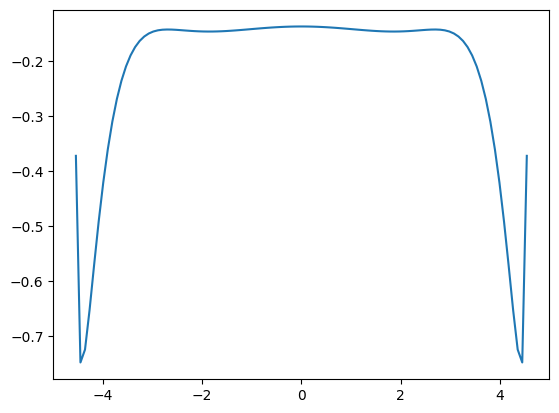

In [18]:
plt.plot(betas, exact_alphas_for_delta_at_zero.real)

Various attempts at getting the broadcasting right for vectorizing coefficient function.

In [19]:
m =np.array([[1,2],[3,4]])   # we start with a matrix

In [20]:
mm = np.array([m,2*m,3*m, 4*m, 5*m])   # we need a different matrix for each of the beta entries, here say there are 5 betas

In [54]:
mm.shape


(5, 2, 2)

In [55]:
v = np.array([1,2])   # we have a starting vector of coefficients

In [57]:
mm@v   # this works

array([[ 5, 11],
       [10, 22],
       [15, 33],
       [20, 44],
       [25, 55]])

In [60]:
(mm@v)[0], m @ v  # each entry is the associated beta matrix applied to v

(array([ 5, 11]), array([ 5, 11]))

In [65]:
# We need to have a coefficient array for each beta.  That means we have 5 arrays, 
# each of which has dimensions 2 x number of regions (or number of regions x 2).
# Turns out we need 2 x number of regions to make multiplication work:

vv = np.array([v, v, v])  # Doesn't work, shape is number of regions=3 x 2, matrix is len_beta x 2 x 2, needs to have second dimension match
vv = vv.T    # Works, now it's 2 x 3.
vv2 = np.zeros((2, 3))  # here is a single starting coefficient array
vv2[:,0] = v   # we set it to have the first vector
vv2

array([[1., 0., 0.],
       [2., 0., 0.]])

In [69]:
(mm @ vv2)   # this works

array([[[ 5.,  0.,  0.],
        [11.,  0.,  0.]],

       [[10.,  0.,  0.],
        [22.,  0.,  0.]],

       [[15.,  0.,  0.],
        [33.,  0.,  0.]],

       [[20.,  0.,  0.],
        [44.,  0.,  0.]],

       [[25.,  0.,  0.],
        [55.,  0.,  0.]]])

In [72]:
(mm @ vv2)[1]   # each entry is the associated beta matrix applied to whole starting coefficient matrix
# this starts to be a bit wasteful: we only need to multiply the first vector.

array([[10.,  0.,  0.],
       [22.,  0.,  0.]])

In [76]:
# We need a coefficient array for each beta
vvv = np.array([vv.T, 2*vv.T,3*vv.T, 4*vv.T, 5*vv.T])
vvv2 = np.array([vv2, 2*vv2, 3*vv2, 4*vv2, 5*vv2])

vvv.shape, vvv2.shape

((5, 3, 2), (5, 2, 3))

In [78]:
mm @ vvv2  # this also works, now each beta matrix is applied to each coefficent array, 
           # which can now have different starting vectors

array([[[  5.,   0.,   0.],
        [ 11.,   0.,   0.]],

       [[ 20.,   0.,   0.],
        [ 44.,   0.,   0.]],

       [[ 45.,   0.,   0.],
        [ 99.,   0.,   0.]],

       [[ 80.,   0.,   0.],
        [176.,   0.,   0.]],

       [[125.,   0.,   0.],
        [275.,   0.,   0.]]])

In [81]:
r = mm @ vvv2
r[1]

array([[20.,  0.,  0.],
       [44.,  0.,  0.]])

In [84]:
# Now we want to set the next entry in each coefficent array to be the matrix times the first entry
vvv2[:,:,1]= r[:,:,0]  # this works
vvv2


array([[[  1.,   5.,   0.],
        [  2.,  11.,   0.]],

       [[  2.,  20.,   0.],
        [  4.,  44.,   0.]],

       [[  3.,  45.,   0.],
        [  6.,  99.,   0.]],

       [[  4.,  80.,   0.],
        [  8., 176.,   0.]],

       [[  5., 125.,   0.],
        [ 10., 275.,   0.]]])

In [85]:
# We do it again
r = mm @ vvv2


In [86]:
vvv2[:,:,2] = r[:,:,1]  # this works
vvv2

array([[[1.000e+00, 5.000e+00, 2.700e+01],
        [2.000e+00, 1.100e+01, 5.900e+01]],

       [[2.000e+00, 2.000e+01, 2.160e+02],
        [4.000e+00, 4.400e+01, 4.720e+02]],

       [[3.000e+00, 4.500e+01, 7.290e+02],
        [6.000e+00, 9.900e+01, 1.593e+03]],

       [[4.000e+00, 8.000e+01, 1.728e+03],
        [8.000e+00, 1.760e+02, 3.776e+03]],

       [[5.000e+00, 1.250e+02, 3.375e+03],
        [1.000e+01, 2.750e+02, 7.375e+03]]])

In [92]:
# to get the coefficents for a particular beta, use the first index, 
vvv2[0], vvv2[0,:,1]  # first beta, first beta second region indices

(array([[ 1.,  5., 27.],
        [ 2., 11., 59.]]),
 array([ 5., 11.]))

In [94]:
# to get the coefficents for all betas in a particular region, do this:
vvv2[:,:,0]  # coefficents in region 1 (index 0) for all betas

array([[ 1.,  2.],
       [ 2.,  4.],
       [ 3.,  6.],
       [ 4.,  8.],
       [ 5., 10.]])

In [108]:
# still something tricky though, I initialized vvv2 by copying coefficient arrays,
# in the program, I won't have that at first I will have a list of starting vectors, like this:

vv = np.array([v, 2*v, 3*v, 4*v, 5*v])   # this is different, it's a starting vector for each beta
vv.shape, vv

((5, 2),
 array([[ 1,  2],
        [ 2,  4],
        [ 3,  6],
        [ 4,  8],
        [ 5, 10]]))

In [102]:
# what would be less wasteful is some vectorized version of this loop:
for i in range(mm.shape[0]):
    print(mm[i]@vv[i])


[ 5 11]
[20 44]
[45 99]
[ 80 176]
[125 275]


In [103]:
# but this isn't it:
mm@vv

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 2)

In [109]:
# maybe newaxis can fix it

In [114]:
vv[:,:,np.newaxis].shape

(5, 2, 1)

In [116]:
mm@vv[...,np.newaxis]  # this works

array([[[  5],
        [ 11]],

       [[ 20],
        [ 44]],

       [[ 45],
        [ 99]],

       [[ 80],
        [176]],

       [[125],
        [275]]])

In [120]:
r = mm@vv[...,np.newaxis] 
r[:,:,0] , r.shape

(array([[  5,  11],
        [ 20,  44],
        [ 45,  99],
        [ 80, 176],
        [125, 275]]),
 (5, 2, 1))

In [143]:
# Okay, that looks better.  Now it seems best to just keep updating r, or even vv itself (called vvn with new axis)
# then we can set a zero array of size len_beta x 2 x number of regions (or nreg x 2 instead?), and assign to it

In [129]:
betas = np.linspace(-1,1, 5)
nreg = 3

In [130]:
coeffs = np.zeros((len(betas), 2, nreg ))

In [140]:
vvn = vv[...,np.newaxis]

In [141]:
coeffs[:,:,0] = vvn[:,:,0]  #this works

In [142]:
coeffs

array([[[ 1.,  0.,  0.],
        [ 2.,  0.,  0.]],

       [[ 2.,  0.,  0.],
        [ 4.,  0.,  0.]],

       [[ 3.,  0.,  0.],
        [ 6.,  0.,  0.]],

       [[ 4.,  0.,  0.],
        [ 8.,  0.,  0.]],

       [[ 5.,  0.,  0.],
        [10.,  0.,  0.]]])

In [144]:
vvn = mm @ vvn

In [145]:
vvn

array([[[  5],
        [ 11]],

       [[ 20],
        [ 44]],

       [[ 45],
        [ 99]],

       [[ 80],
        [176]],

       [[125],
        [275]]])

In [146]:
coeffs[:,:,1] = vvn[:,:,0]

In [147]:
coeffs

array([[[  1.,   5.,   0.],
        [  2.,  11.,   0.]],

       [[  2.,  20.,   0.],
        [  4.,  44.,   0.]],

       [[  3.,  45.,   0.],
        [  6.,  99.,   0.]],

       [[  4.,  80.,   0.],
        [  8., 176.,   0.]],

       [[  5., 125.,   0.],
        [ 10., 275.,   0.]]])

In [148]:
vvv = mm @ vvn

In [149]:
coeffs[:,:,2] = vvn[:,:,0]

In [150]:
coeffs

array([[[  1.,   5.,   5.],
        [  2.,  11.,  11.]],

       [[  2.,  20.,  20.],
        [  4.,  44.,  44.]],

       [[  3.,  45.,  45.],
        [  6.,  99.,  99.]],

       [[  4.,  80.,  80.],
        [  8., 176., 176.]],

       [[  5., 125., 125.],
        [ 10., 275., 275.]]])

## This is final form of vectorization for coefficient function

In [299]:
# last issue is how we get vv in the first place.  For the signed version of radiation modes we automatically have it,
# but for the others we need to set it up.  Ideally we wouldn't have to do this:
c0, c1 = 1, 2
v0 = np.array([c0, c1])

vv3 = np.array([v0 for i in range(len(betas))])  # don't want to do this

# since the betas themselves may be an array of higher dimension, ie they may be more than just an array version of a list of numbers.
# the below seems to work, and incorporates the new axis already
Betas = np.ones((2,2))
vv4 = np.zeros(Betas.shape + (2,1))  # works for any beta shape, this is what we want

vv4[..., :, 0] = np.array([[v0,2*v0],[-2*v0,v0]])


In [300]:
vv4[1,0] # any entry of the beta array now has the starting vector we want

array([[-2.],
       [-4.]])

In [301]:
# Now to see about applying the matrix, need matrix for each Beta in array now
MM = np.zeros(Betas.shape + (2,2))
MM[..., :,:] = m  # now we set it with a matrix, in reality the matrix would be different for each entry

In [303]:
MM[0,1]

array([[1., 2.],
       [3., 4.]])

In [304]:
# this works, but it's long to print
# MM@vv4

In [305]:
# Oh and we also need the coefficient arrays

Coeffs = np.zeros(Betas.shape + (2, nreg ))

In [306]:
# Now we go through same process
Coeffs[..., :, 0] = vv4[..., :, 0]  

In [307]:
Coeffs[1,1]

array([[1., 0., 0.],
       [2., 0., 0.]])

In [308]:
vv4 = MM@vv4

In [309]:
Coeffs[..., :, 1] = vv4[..., :, 0] 

In [310]:
Coeffs[1,1]

array([[ 1.,  5.,  0.],
       [ 2., 11.,  0.]])

In [311]:
vv4 = MM@vv4

In [312]:
Coeffs[..., :, 2] = vv4[..., :, 0] 

In [313]:
Coeffs[1,1]

array([[ 1.,  5., 27.],
       [ 2., 11., 59.]])